In [58]:
import pandas as pd
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from datalayer import read_csv_sim
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 500)
%matplotlib inline

### DATA Meanining and Dictionary

In [56]:
#Dicionários
dict_raca = {1:'Branca', 2:'Preta', 3:'Amarela', 4: 'Parda', 5: 'Indígena'}

dic_est_civ ={1:'Solteiro', 2: 'Casado', 3: 'Viúvo', 4: 'Divorciado', 5: 'Estável', 9: 'Ignorado'}

dic_esc = {1: 'Nenhuma', 2: 'de 1 a 3 anos', 3: 'de 4 a 7 anos', 4: 'de 8 a 11 anos', 5: '12 anos e mais', 9: 'Ignorado'}

dict_esc2010 = {0: 'Sem escolaridade', 1: 'Fundamental I (1ª a 4ª série)', 
                2: 'Fundamental II (5ª a 8ª série)', 3: 'Médio (antigo 2º Grau)', 
                4: 'Superior incompleto', 5: 'Superior completo', 9: 'Ignorado'}

dict_lococor = {1: 'hospital', 2: 'outros estabelecimentos de saúde', 3: 'domicílio', 
                4: 'via pública', 5: 'outros', 9: 'ignorado'} #Obito local    

dict_assist_med = {1: 'Com assistência', 2: 'Sem assistência', 9: 'Ignorado'}

dict_necropsia = {1:'sim', 2:'não', 9:'ignorado'}

dict_tppos = {1: 'sim', 2: 'não'}

dict_atestante = {1: 'Sim', 2: 'Substituto', 3: 'IML', 4: 'SVO', 5: 'Outros'}               

dict_stcodifica = {S:'Sim', N:'Não'}

dict_escfalagr1 = {0: 'Sem Escolaridade', 
                   1: 'Fundamental I Incompleto', 
                   2: 'Fundamental I Completo', 
                   3: 'Fundamental II Incompleto', 
                   4: 'Fundamental II Completo', 
                   5: 'Ensino Médio Incompleto', 
                   6: 'Ensino Médio Completo', 
                   7: 'Superior Incompleto', 
                   8: 'Superior Completo', 
                   9: 'Ignorado', 
                   10: 'Fundamental I Incompleto ou Inespecífico', 
                   11: 'Fundamental II Incompleto ou Inespecífico', 
                   12: 'Ensino Médio Incompleto ou Inespecífico'}

dict_stdoepidem = {1:'Sim', 0:'Não'}

dict_stdnova = {1:'Sim', 0:'Não'}

In [ ]:
# Discussão sobre Caracteristicas
#PESQUISAR:
# LINHAA     =     
# LINHAB     =     
# LINHAC     =

#Poucos dados EXCLUIR
# 3) LINHAD     =  Atestado conforme o CID            
# 4) LINHAII    =

# NUMEROLOTE = Número do lote
# STCODIFICA = Status de instalação: se codificadora (valor: S) ou não (valor: N)

#EXCLUIR:
    #http://ghiorzi.org/DVnew.htm#b
    ?(Excluir?) # NUMERODV = Número do Dígito Verificador (vem cpf?)      
    ?(Excluir?) # ORIGEM     = Não achei descrição: 1, 2, 3

    #Redundante
    Excluir # 2) SERIESCFAL =  Série escolar do falecido. Valores de 1 a 8.        
    Excluir: dict_escfalagr1 x dict_esc2010 x dic_est_civ x dic_esc
    
    #Quais são os médicos que  matam mais?
    # CRM   = Nº do CRM

#Como TRATAR?
    -> ARRUMAR IDADES
    
    -> CAUSABAS_O =  Causa básica Original
    
    #->DADO IMPORTANTE
    ? Incompleto(falta dados) # NUMERODO   = DO + UF(2) + ANO() 

    #Ver melhor maneira de usar!
    Não Excluir# 1) NUMSUS     = Excluir (falta 76.315254% dos dados!)     
    
    #Utilizar anos? Meses?
    # DTOBITO    =  Data Obito 
    #(Excluir?) DTATESTADO = Data do atestado: dd mm aaaa  
    #DTCADASTRO Data do atestado: dd mm aaaa  
    #DTRECEBIM  = Data do recebimento: dd mm aaaa
    #DIFDATA =  Diferença entre a data de óbito e data do recebimento original da DO   
    
    -> Excluir Dado motivo eh q nao parece fazer sentido numeracao errada e diversa! 
    Ou tentar usar o q for possivel
    # NATURAL    =  Naturalidade, conforme a tabela de países. Se for brasileiro,
    # porém, o primeiro dígito contém 8 e os demais o código da UF de naturalidade.      

    -> OCUP tratar ou não tratar 
    
    #Quebrar os primeiros dois digitos -> Estado
    ->CODMUNRES  =  Código do município de residência
    ->CODMUNOCOR =  Código do município de ocorrência

In [4]:
## Resumao Gerado!

#http://svs.aids.gov.br/download/Dicionario_de_Dados_SIM_tabela_DOM.pdf
# https://github.com/rfsaldanha/microdatasus/wiki/Conven%C3%A7%C3%B5es-SIM

? Incompleto# NUMERODO   = DO + UF(2) + ANO() 

#-> Identificação do óbito 
# dado nao ligado a outras informacoes diretamente
#(aparentemente)      

# CODINST    = Código da Instalação da Geração dos Registros
# Um numero a menos aparentemente entretanto segundo gov tá certo 
# – 1º caractere: nível de instalação (M – municipal; R – regional; E – estadual); 
# – 2º e 3º caractere: UF de instalação; 
# – 4º ao 9º caractere: código do município de instalação; 
# – 10º ao 13º caractere: nº da máquina de instalação

#http://ghiorzi.org/DVnew.htm#b
?(Excluir?) # NUMERODV = Número do Dígito Verificador (vem cpf?)      
?(Excluir?) # ORIGEM     = Não achei descrição: 1, 2, 3

# DTOBITO    =  Data Obito    

#Ver melhor maneira de usar!
Não Excluir# 1) NUMSUS     = Excluir (falta 76.315254% dos dados!)     

#DADO IMPORTANTE
?5)Excluir Dado motivo eh q nao parece fazer sentido numeracao errada e diversa! 
Ou tentar usar o q for possivel
# NATURAL    =  Naturalidade, conforme a tabela de países. Se for brasileiro,
# porém, o primeiro dígito contém 8 e os demais o código da UF de naturalidade.      

# CODMUNNATU =  Código do município de naturalidade do falecido       

# DTNASC     = Data de nascimento no formato ddmmaaaa     

# IDADE      =   Idade, composto de dois subcampos. O primeiro, de 1
# dígito, indica a unidade da idade, conforme a tabela a
# seguir. O segundo, de dois dígitos, indica a quantidade de
# unidades:
# 0: Idade ignorada, o segundo subcampo e
# 1: Horas, o segundo subcampo varia de 01 a 23
# 2: Dias, o segundo subcampo varia de 01 a 29
# 3: Meses, o segundo subcampo varia de 01 a 11
# 4: Anos, o segundo subcampo varia de 00 a 99
# 5: Anos (mais de 100 anos), o segundo subcampo varia de
# 0 a 99,Exemplos:
# 000: Idade ignorada
# 020: 20 minutos
# 103: 3 horas
# 204: 4 dias
# 305: 5 meses
# 400: menor de 1 ano, mas não se sabe o numero de horas,
# dias ou meses
# 410: 10 anos
# 505: 105 anos 

# RACACOR    = Raça/Cor:# 1:Branca# 2:Preta# 3:Amarela# 4: Parda # 5: Indígena
dict_raca = {1:'Branca', 2:'Preta', 3:'Amarela', 4: 'Parda', 5: 'Indígena'}

# ESTCIV     = Situação conjugal: 1 – Solteiro; 2 – Casado; 3 – Viúvo; 4 – Separado
# judicialmente/divorciado; 5 – União estável; 9 – Ignorado.
dic_est_civ ={1:'Solteiro', 2: 'Casado', 3: 'Viúvo', 4: 'Divorciado', 5: 'Estável', 9: 'Ignorado'}

# ESC        =  Escolaridade em anos. Valores: 1 – Nenhuma; 2 – de 1 a 3 anos; 3 – de
# 4 a 7 anos; 4 – de 8 a 11 anos; 5 – 12 anos e mais; 9 – Ignorado.
dic_esc = {1: 'Nenhuma', 2: 'de 1 a 3 anos', 3: 'de 4 a 7 anos', 4: 'de 8 a 11 anos', 5: '12 anos e mais', 9: 'Ignorado'}

# ESC2010    = Escolaridade 2010. Valores: 0 – Sem escolaridade; 1 – Fundamental I
# (1ª a 4ª série); 2 – Fundamental II (5ª a 8ª série); 3 – Médio (antigo 2º
# Grau); 4 – Superior incompleto; 5 – Superior completo; 9 – Ignorado.
dict_esc2010 = {0: 'Sem escolaridade', 1: 'Fundamental I (1ª a 4ª série)', 
                2: 'Fundamental II (5ª a 8ª série)', 3: 'Médio (antigo 2º Grau)', 
                4: 'Superior incompleto', 5: 'Superior completo', 9: 'Ignorado'}

Excluir # 2) SERIESCFAL =  Série escolar do falecido. Valores de 1 a 8.        

?# OCUP       =  Ocupação habitual e ramo de atividade  (como tratar)
# CODMUNRES  =  Código do município de residência      
# LOCOCOR    = Local de ocorrência do óbito: 
dict_lococor = {1: 'hospital', 2: 'outros estabelecimentos de saúde', 3: 'domicílio', 
                4: 'via pública', 5: 'outros', 9: 'ignorado'}# CODESTAB   =       

# CODMUNOCOR = Código do município de ocorrência IBGE
# ASSISTMED  = Indica se houve assistência medica, conforme a tabela:
dict_assist_med = {1: 'Com assistência', 2: 'Sem assistência', 9: 'Ignorado'}
    
# NECROPSIA  = Confirmação do diagnóstico por necrópsia: 1 – sim; 2 – não; 9 –ignorado.
dict_necropsia = {1:'sim', 2:'não', 9:'ignorado'}

#DUVIDAS:
# LINHAA     =   X  
# LINHAB     =   X 
# LINHAC     =   X
# 3) LINHAD  =  Atestado conforme o CID            
# 4) LINHAII =   X 

#Quais são os médicos que  matam mais?
# CRM        = Nº do CRM
# DTATESTADO = Data do atestado: dd mm aaaa        

? # NUMEROLOTE = Número do lote        

# TPPOS      =   Óbito investigado: 1 – sim; 2 – não
dict_tppos = {1: 'sim', 2: 'não'}
# CAUSABAS_O =  Causa básica Original
   
# DTCADASTRO = Caracter 8 Data do cadastro: dd mm aaaa
              
# ATESTANTE  = Indica se o médico que assina atendeu o paciente: 
dict_atestante = {1: 'Sim', 2: 'Substituto', 3: 'IML', 4: 'SVO', 5: 'Outros'}               

# STCODIFICA = Status de instalação: se codificadora (valor: S) ou não (valor: N)
dict_stcodifica = {S:'Sim', N:'Não'}

# DTRECEBIM  = Data do recebimento: dd mm aaaa

?# ATESTADO   = CIDs informado no atestado                   
?# DTRECORIGA =                  
# ESCFALAGR1  = Escolaridade 2010 agregada. Valores: 
dict_escfalagr1 = {0: 'Sem Escolaridade', 
                   1: 'Fundamental I Incompleto', 
                   2: 'Fundamental I Completo', 
                   3: 'Fundamental II Incompleto', 
                   4: 'Fundamental II Completo', 
                   5: 'Ensino Médio Incompleto', 
                   6: 'Ensino Médio Completo', 
                   7: 'Superior Incompleto', 
                   8: 'Superior Completo', 
                   9: 'Ignorado', 
                   10: 'Fundamental I Incompleto ou Inespecífico', 
                   11: 'Fundamental II Incompleto ou Inespecífico', 
                   12: 'Ensino Médio Incompleto ou Inespecífico'}

# STDOEPIDEM = Status de DO Epidemiológica. Valores: 1 – SIM; 0 – NÃO 
dict_stdoepidem = {1:'Sim', 0:'Não'}

# STDONOVA   = Status de DO Nova. Valores: 1 – SIM; 0 – NÃO            
dict_stdnova = {1:'Sim', 0:'Não'}

# DIFDATA    = Diferença entre a data de óbito e data do recebimento original da DO
# ([DTOBITO] – [DTRECORIG])
    

# Names	Porcentagem
# 5	NUMSUS	76.315254
# 14	SERIESCFAL	84.554459
# 25	LINHAD	78.662528
# 26	LINHAII	67.777552

### Reading data...

In [5]:
# #Verifica se 10 % dos dados completos para manter coluna!
# #Transforma dados datetime
# #Tira dados duplicados
# #Coonvert meses
# #Convert endereco

data = read_csv_sim('../data/Mortalidade Prostata SIM-SUS.csv')

C:\Users\Natan\Anaconda3\envs\BcgCancer\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (7,23,53) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [44]:
data.head(100)

,NUMERODO,CODINST,NUMERODV,ORIGEM,DTOBITO,NUMSUS,NATURAL,CODMUNNATU,DTNASC,IDADE,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,CODMUNOCOR,ASSISTMED,NECROPSIA,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CRM,DTATESTADO,NUMEROLOTE,TPPOS,CAUSABAS_O,DTCADASTRO,ATESTANTE,STCODIFICA,DTRECEBIM,ATESTADO,DTRECORIGA,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA
0,20001402,MAC1200400001,1.0,1,2014-01-04,8.980040e+14,813.0,130260.0,1944-10-02,469,1.0,1.0,2.0,1.0,NaN,999993.0,120040,1,2001586.0,120040,NaN,NaN,*R688,*C61X,NaN,NaN,NaN,1507,2014-01-04,20150002.0,N,C61,2014-01-20,NaN,S,2015-01-30,R688/C61,2014-01-24,10.0,0.0,0.0,391.0
1,20001481,MAC1200400001,1.0,1,2014-01-06,NaN,812.0,120060.0,1930-11-05,483,NaN,3.0,1.0,0.0,NaN,632205.0,120040,3,NaN,120040,NaN,NaN,*C787,*C61X,NaN,NaN,NaN,1073,2014-01-06,20140017.0,S,R99,2014-01-20,NaN,S,2014-08-29,C787/C61,2014-01-24,0.0,0.0,0.0,235.0
2,20001463,MAC1200400001,3.0,1,2014-01-13,NaN,812.0,120050.0,1932-05-05,481,1.0,2.0,1.0,0.0,NaN,632205.0,120040,1,2001586.0,120040,1.0,2.0,*R688,*J980,*R11X,*C61X,NaN,20955,2014-01-13,20140003.0,N,C61,2014-02-07,5.0,S,2014-02-17,R688/J980/R11/C61,2014-02-17,0.0,0.0,0.0,35.0
3,20001587,MAC1200400001,7.0,1,2014-01-26,NaN,812.0,120050.0,1933-09-19,480,2.0,1.0,2.0,1.0,NaN,999993.0,120040,3,NaN,120040,NaN,NaN,*I500,*I10X,*C61X,NaN,NaN,1723,2014-01-26,20140014.0,S,R99,2014-02-10,5.0,S,2014-07-17,I500/I10/C61,2014-02-17,10.0,0.0,0.0,172.0
4,18385732,MAC1200200002,1.0,1,2014-01-26,NaN,812.0,120039.0,1913-03-11,500,1.0,1.0,9.0,9.0,NaN,999993.0,120020,3,NaN,120020,NaN,NaN,*R688,*A419,*C61X*C229,NaN,NaN,NaN,NaT,20140010.0,S,R98,2014-02-28,NaN,S,2014-05-16,R688/A419/C61 C229,2014-02-28,9.0,0.0,0.0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24467635,MAC1200400001,6.0,1,2016-12-29,NaN,NaN,NaN,1940-09-23,476,4.0,2.0,2.0,1.0,NaN,622020.0,120040,3,NaN,120040,NaN,NaN,*I219,*C61X,NaN,NaN,NaN,1121,2016-12-29,20170018.0,S,R99,2017-02-09,5.0,S,2017-10-16,I219/C61,2017-02-24,10.0,0.0,1.0,291.0
96,24467699,MAC1200400001,2.0,1,2016-12-31,7.096006e+14,812.0,120040.0,1946-01-13,470,4.0,1.0,2.0,1.0,NaN,999993.0,120040,1,2001586.0,120040,NaN,NaN,*C795,*C61X,NaN,NaN,NaN,544,2016-12-31,20170003.0,N,C61,2017-02-16,5.0,S,2017-02-24,C795/C61,2017-02-24,10.0,0.0,1.0,55.0
97,26050154,MAC1200400001,9.0,1,2017-05-10,NaN,812.0,120040.0,1939-01-30,478,1.0,2.0,2.0,1.0,NaN,999993.0,120040,3,NaN,120040,NaN,NaN,*J960,*I10X,*C61X,NaN,NaN,1124,2017-05-10,20170011.0,N,C61,2017-07-12,5.0,S,2017-07-14,J960/I10/C61,2017-07-14,10.0,0.0,1.0,65.0
98,24467625,MAC1200400001,9.0,1,2017-01-12,7.067076e+14,812.0,120030.0,1938-10-13,478,4.0,4.0,2.0,1.0,NaN,632205.0,120040,1,2001586.0,120040,NaN,NaN,*J960,*A419,*C795,*C61X,NaN,1304,2017-01-12,20170003.0,N,C61,2017-02-23,2.0,S,2017-02-24,J960/A419/C795/C61,2017-02-24,10.0,0.0,1.0,43.0


### Drop more Collums?


In [60]:
data2 = data.copy()
quant_NaN_porcent = (data2.isna().sum() / data2.shape[0])*100

#Print all Values
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(quant_NaN_porcent)

#Transfor NaN in dataframe %
d = {'Names': quant_NaN_porcent.index.values, 'Porcentagem Faltante': quant_NaN_porcent.values}
df = pd.DataFrame(data=d)
df

# Evaluation
df[df['Porcentagem Faltante']>60]


,Names,Porcentagem Faltante
0,NUMERODO,0.000000
1,CODINST,0.000000
2,NUMERODV,0.154337
3,ORIGEM,0.000000
4,DTOBITO,0.000000
5,NUMSUS,76.315254
6,NATURAL,7.978020
7,CODMUNNATU,10.086157
8,DTNASC,0.061056
9,IDADE,0.000000


,Names,Porcentagem Faltante
5,NUMSUS,76.315254
14,SERIESCFAL,84.554459
25,LINHAD,78.662528
26,LINHAII,67.777552


### Know unique information

In [43]:
train_data = data.copy()
lin, col = train_data.shape

for val in range(0,col):
    string_val = 'train_data.'+ str(train_data.columns[val]) + '.unique()'
    string_val = 'train_data.'+ str(train_data.columns[val]) + '.unique()'    
    print("Existem {} tipos de {}, nesse dataset como: \n {} \n... \n".format(len(eval(string_val)),train_data.columns[val], ", " .join(eval(string_val)[0:10].astype(str))))
    

Existem 58959 tipos de NUMERODO, nesse dataset como: 
 20001402, 20001481, 20001463, 20001587, 18385732, 20001575, 18385824, 20001681, 20000551, 20001847 
... 

Existem 2935 tipos de CODINST, nesse dataset como: 
 MAC1200400001, MAC1200200002, MAC1200500001, MAC1200010001, MAC1200600001, MAC1200420001, MAC1200100001, MAC1200300001, MAC1200380001, MAC1200330001 
... 

Existem 11 tipos de NUMERODV, nesse dataset como: 
 1.0, 3.0, 7.0, 4.0, 0.0, 6.0, 9.0, 8.0, 2.0, 5.0 
... 

Existem 3 tipos de ORIGEM, nesse dataset como: 
 1, 2, 3 
... 

Existem 1461 tipos de DTOBITO, nesse dataset como: 
 2014-01-04T00:00:00.000000000, 2014-01-06T00:00:00.000000000, 2014-01-13T00:00:00.000000000, 2014-01-26T00:00:00.000000000, 2014-01-28T00:00:00.000000000, 2014-01-30T00:00:00.000000000, 2014-02-07T00:00:00.000000000, 2014-02-09T00:00:00.000000000, 2014-02-21T00:00:00.000000000, 2014-03-15T00:00:00.000000000 
... 

Existem 13761 tipos de NUMSUS, nesse dataset como: 
 898003997405672.0, nan, 123002628370

### Describe information

In [35]:
data.describe()

,NUMERODO,NUMERODV,ORIGEM,NUMSUS,NATURAL,CODMUNNATU,IDADE,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,CODMUNOCOR,ASSISTMED,NECROPSIA,NUMEROLOTE,ATESTANTE,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA
count,5.896200e+04,58871.000000,58962.000000,1.396500e+04,54258.000000,53015.000000,58962.000000,56689.000000,57087.000000,55496.000000,54125.000000,9107.000000,49549.000000,58962.000000,58962.000000,4.325300e+04,58962.000000,40347.000000,40058.000000,5.893100e+04,51729.000000,54125.000000,58932.000000,58960.000000,58954.000000
mean,2.242391e+07,4.112194,1.001238,6.118081e+14,820.004147,316798.310705,477.117245,2.201891,2.533957,3.217133,2.330291,3.981992,774465.723123,330699.489620,1.596452,2.731883e+06,330883.342916,1.751035,2.373608,2.015785e+07,2.585146,6.575002,0.000034,0.758396,95.243325
std,2.174592e+06,3.031027,0.047478,3.000368e+14,89.125922,79344.661739,11.065117,1.396858,1.485298,2.462519,2.818495,1.711547,266899.935788,88535.036321,0.945254,1.644913e+06,88509.906954,2.248570,1.650207,1.217801e+04,1.651755,4.516741,0.005826,0.428059,147.945330
min,1.488570e+05,0.000000,1.000000,0.000000e+00,4.000000,110002.000000,303.000000,1.000000,1.000000,0.000000,0.000000,1.000000,10205.000000,110001.000000,1.000000,1.900000e+01,110001.000000,1.000000,1.000000,2.014000e+07,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.089540e+07,1.000000,1.000000,2.098661e+14,826.000000,260960.000000,471.000000,1.000000,2.000000,2.000000,1.000000,3.000000,621005.000000,280290.000000,1.000000,2.090236e+06,280210.000000,1.000000,2.000000,2.015001e+07,1.000000,2.000000,0.000000,1.000000,19.000000
50%,2.249954e+07,4.000000,1.000000,7.046076e+14,831.000000,313310.000000,478.000000,1.000000,2.000000,2.000000,1.000000,4.000000,914405.000000,330455.000000,1.000000,2.363682e+06,330455.000000,1.000000,2.000000,2.016001e+07,2.000000,9.000000,0.000000,1.000000,36.000000
75%,2.401267e+07,7.000000,1.000000,8.980004e+14,835.000000,354160.000000,484.000000,4.000000,3.000000,4.000000,3.000000,4.000000,999993.000000,355280.000000,3.000000,2.758245e+06,355240.000000,1.000000,2.000000,2.017001e+07,5.000000,10.000000,0.000000,1.000000,75.000000
max,9.904886e+07,9.000000,3.000000,9.980500e+14,999.000000,530010.000000,999.000000,5.000000,9.000000,9.000000,9.000000,8.000000,999994.000000,530010.000000,9.000000,9.999998e+06,530010.000000,9.000000,9.000000,2.019002e+07,5.000000,12.000000,1.000000,1.000000,824.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58962 entries, 0 to 58961
Data columns (total 42 columns):
NUMERODO      58962 non-null int64
CODINST       58962 non-null object
NUMERODV      58871 non-null float64
ORIGEM        58962 non-null int64
DTOBITO       58962 non-null datetime64[ns]
NUMSUS        13965 non-null float64
NATURAL       54258 non-null float64
CODMUNNATU    53015 non-null float64
DTNASC        58926 non-null datetime64[ns]
IDADE         58962 non-null int64
RACACOR       56689 non-null float64
ESTCIV        57087 non-null float64
ESC           55496 non-null float64
ESC2010       54125 non-null float64
SERIESCFAL    9107 non-null float64
OCUP          49549 non-null float64
CODMUNRES     58962 non-null int64
LOCOCOR       58962 non-null int64
CODESTAB      43253 non-null float64
CODMUNOCOR    58962 non-null int64
ASSISTMED     40347 non-null float64
NECROPSIA     40058 non-null float64
LINHAA        57045 non-null object
LINHAB        45257 non-null object
LINHA

### Analyzing Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B3AC6DE48>,
      dtype=object)

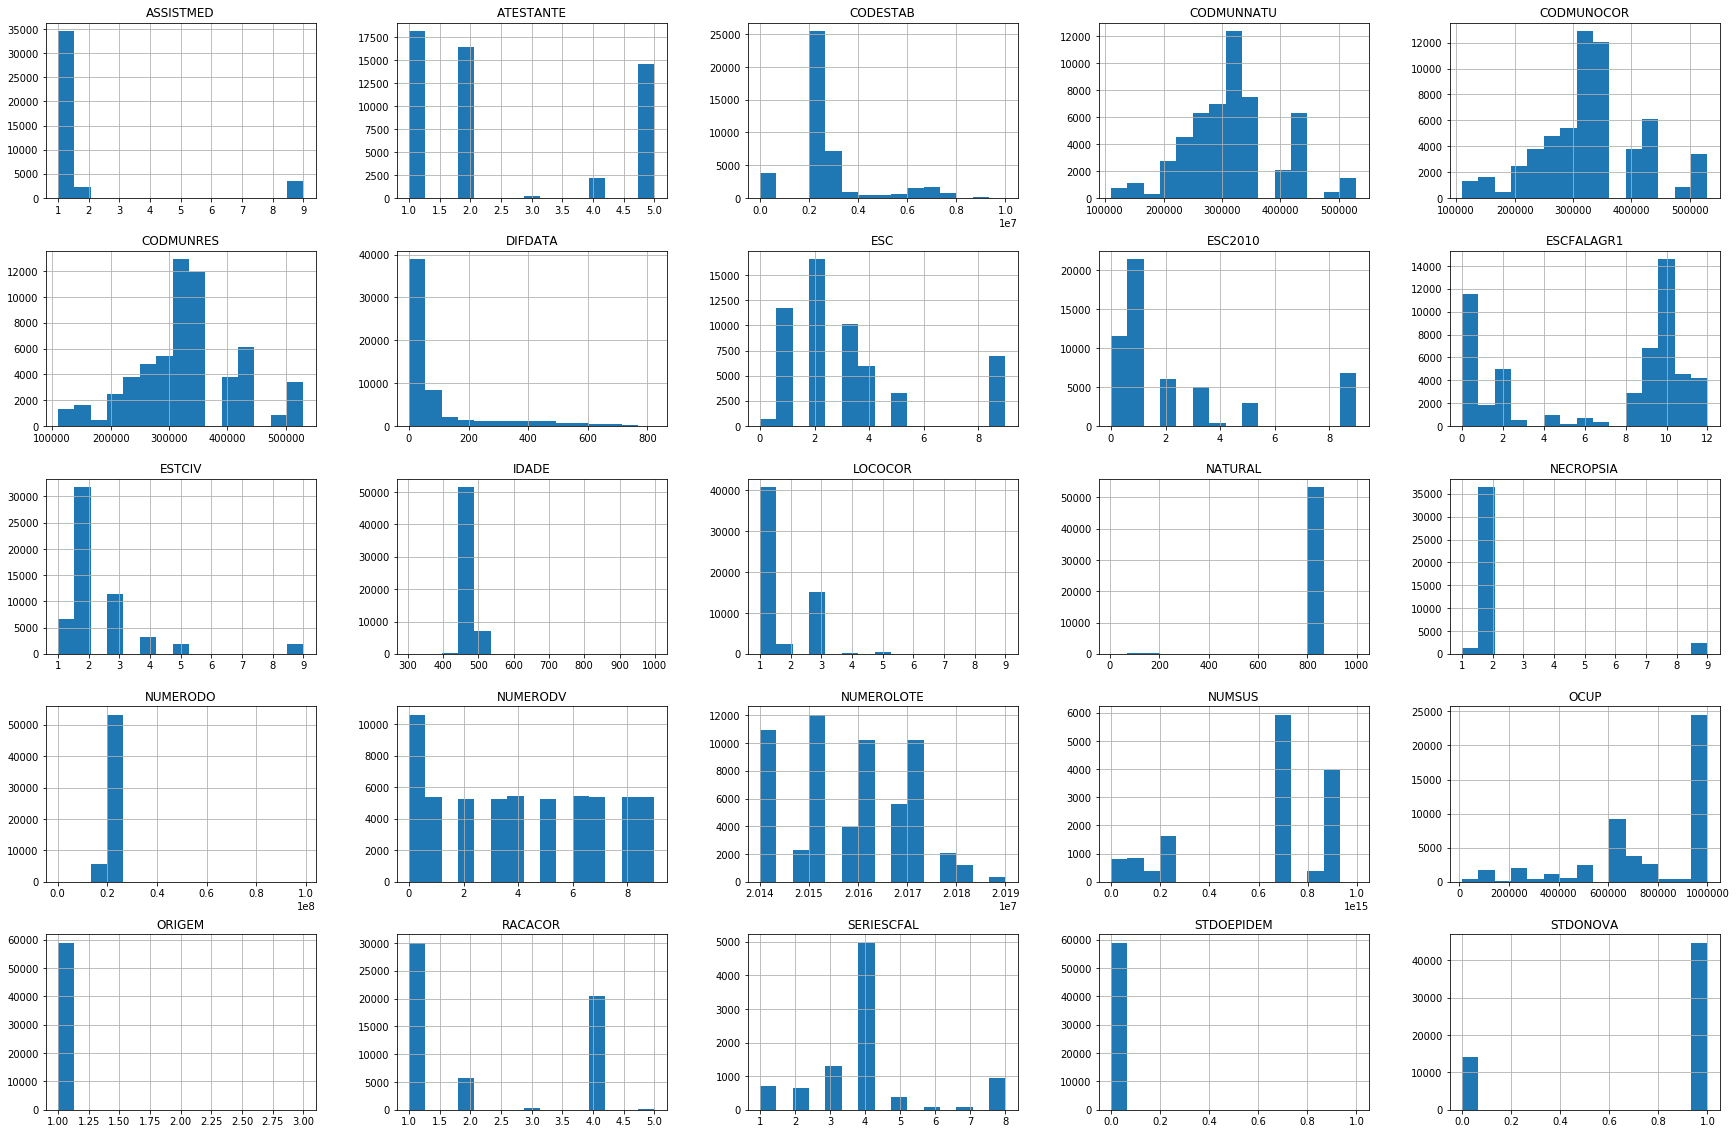

In [7]:
numerical = data._get_numeric_data().columns
data[numerical].hist(bins=15, figsize=(30, 20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B3C240548>,
      dtype=object)

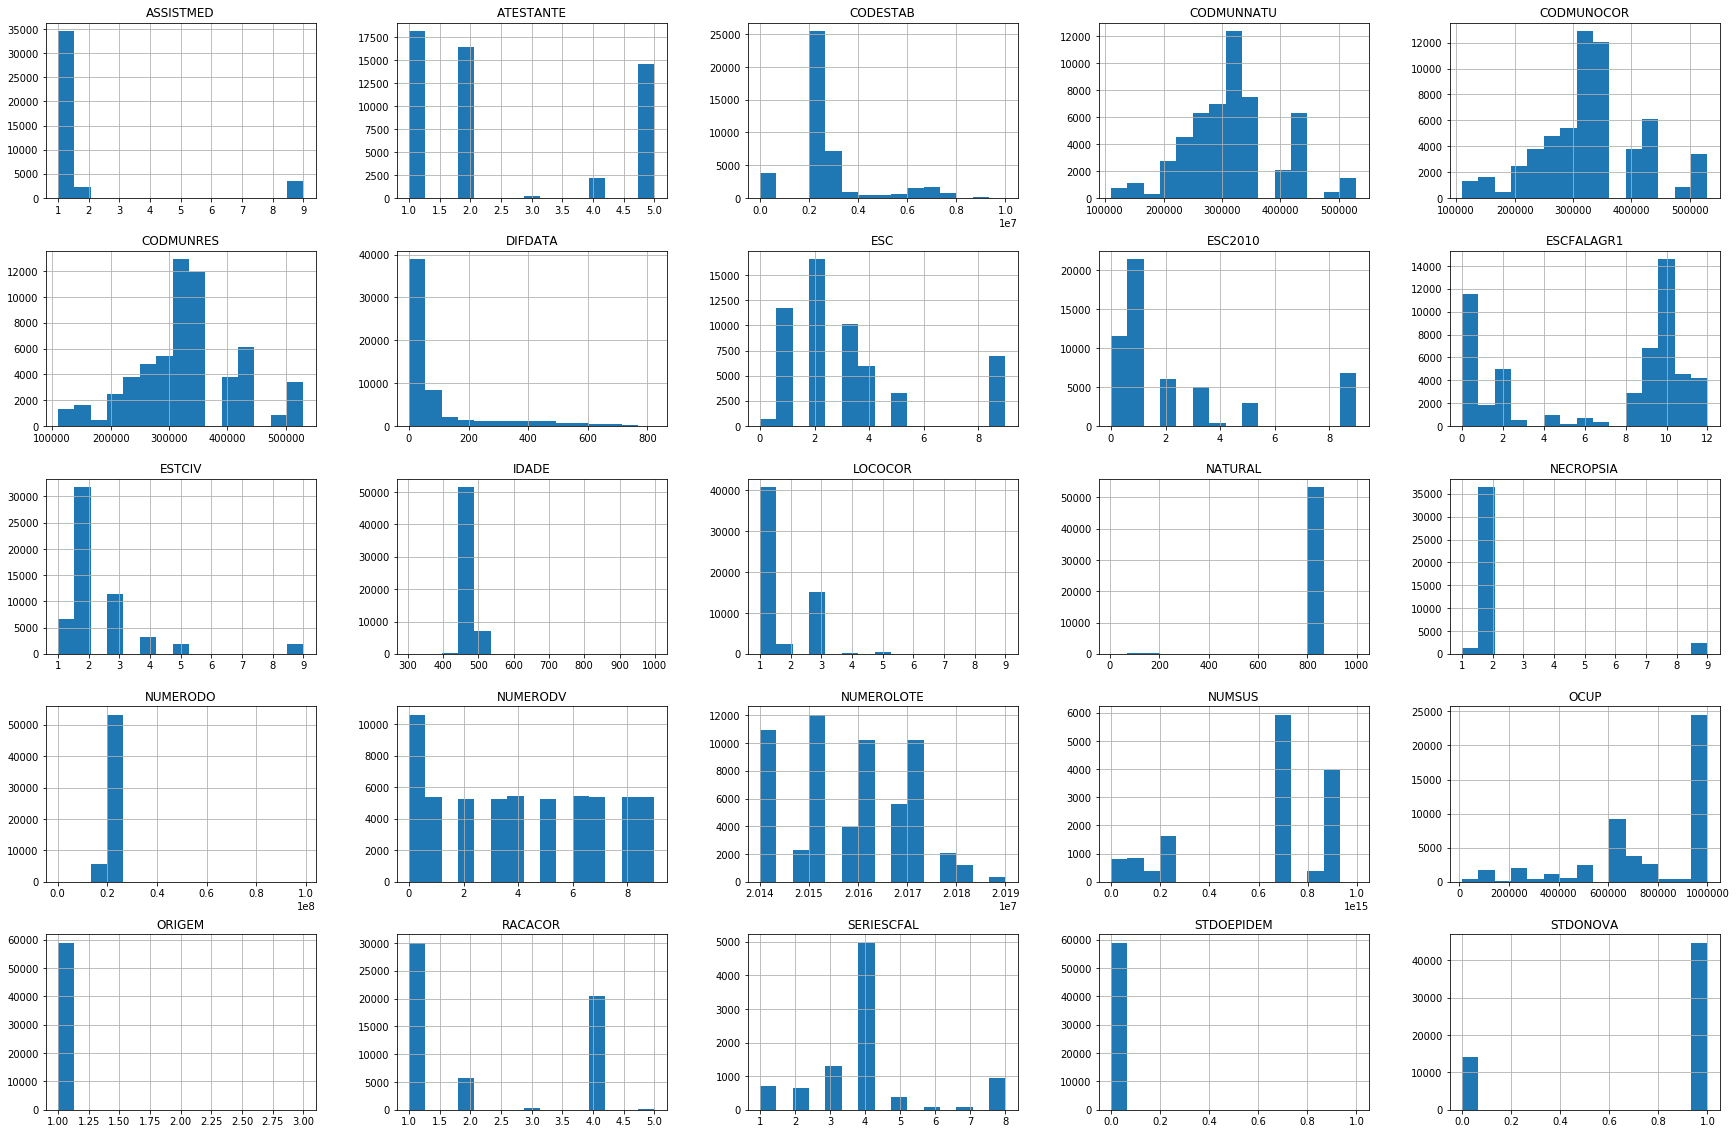

In [8]:
data[numerical].hist(bins=15, figsize=(30, 20))

### Categorial Columns

In [9]:
set(data.columns) - set(numerical)

{'ATESTADO',
 'CAUSABAS_O',
 'CODINST',
 'CRM',
 'DTATESTADO',
 'DTCADASTRO',
 'DTNASC',
 'DTOBITO',
 'DTRECEBIM',
 'DTRECORIGA',
 'LINHAA',
 'LINHAB',
 'LINHAC',
 'LINHAD',
 'LINHAII',
 'STCODIFICA',
 'TPPOS'}

#### Lixo


In [ ]:
#Datalayer do SIM!

# import pandas as pd
# import ntpath
# import utils
          
# def read_csv_sim(path):
#     '''
#     Files:
    
#     Mortalidade Colon e Reto SIM-SUS.csv
#     Mortalidade Linfoma de Hodgkin SIM-SUS.csv
#     Mortalidade Linfoma não Hodgkin SIM-SUS.csv
#     Mortalidade Mama SIM-SUS.csv
#     Mortalidade Prostata SIM-SUS.csv
#     Mortalidade Pulmão SIM-SUS.csv
    
    
#     '''
#     useless_columns = ['VERSAOSCB', 'VERSAOSIST', 'Unnamed: 0', 'HORAOBITO'] 
    
#     data = pd.read_csv(path, error_bad_lines=False, encoding='latin1')
#     data = data.drop(useless_columns, 1)
#     data = data.dropna(axis=1, how='all') # drop all columns with all values NaN
#     data = utils.drop_columns_with_same_value(data)
    
#     relevant_col = utils.get_relevant_columns(data)
#     data = data[relevant_col].copy()
    
    
#     data = utils.tranform_float_to_datetime(data,
#                                       ['DTNASC', 'DTCADASTRO',
#                                        'DTRECORIGA', 'DTRECEBIM',
#                                        'DTATESTADO'])
    
#     data = utils.tranform_str_to_datetime(data, ['DTOBITO'])
    
    
#     return data

#UTILS
# import pandas as pd

# def get_relevant_columns(data):
#     """
#     Get only columns with at least 10% of rows.
    
#     """
#     count_non_nan = data.notnull().sum()
#     count_non_nan = count_non_nan[count_non_nan > len(data) * 0.1]
    
#     return count_non_nan.index

# def drop_columns_with_same_value(data):
#     nunique = data.apply(pd.Series.nunique)
#     cols_to_drop = nunique[nunique == 1].index
#     data = data.drop(cols_to_drop, axis=1)
    
#     return data

# def get_number_month(month):
#     dict_month = {'Jan' : 1,
#               'Fev' : 2,
#               'Mar' : 3,
#               'Abr': 4,
#               'Mai': 5,
#               'Jun': 6,
#               'Jul': 7,
#               'Ago': 8,
#               'Set': 9,
#               'Out': 10,
#               'Nov': 11,
#               'Dez': 12}
    
#     return dict_month[month]

# def tranform_str_to_datetime(data, columns):
#     for col in columns:
#         data[col] = data[col].astype(str)
#         data[col] = data[col].str.zfill(8)
#         data[col] = pd.to_datetime(data[col], dayfirst=True, format='%d%m%Y')
   
#     return data


# def tranform_float_to_datetime(data, columns):
#     for col in columns:
#         data[col] = data[col].astype(str)
#         data[col] = data[col].str.zfill(10)
#         data[col] = pd.to_datetime(data[col], dayfirst=True, format='%d%m%Y.0', errors='coerce')
   
#     return data


# def get_municipio_info(data, columns_cod):
#     municipio = pd.read_csv('../data/municipios_git.csv', sep=';')

#     municipio['codigo_ibge'] = municipio['codigo_ibge'].astype(str)
#     municipio['codigo_ibge'] = municipio['codigo_ibge'].str[:-1] # numero verificador removed
#     municipio['codigo_ibge'] = pd.to_numeric(municipio['codigo_ibge'])


#     for col in columns_cod:
#         municipio_col = municipio.copy()
#         municipio_col.columns = ['{0}_{1}'.format(col, x) for x in municipio_col]
#         municipio_col[col] = municipio_col['{0}_{1}'.format(col, 'codigo_ibge')]

#         data = data.merge(municipio_col, how='left', on=col) 

#         data = data.drop('{0}_{1}'.format(col, 'codigo_ibge'), 1)
    
#     return data
    
    
# def trasnform_cep_in_feature(data, columns):
#     """
#     CEP dictionary:

#     X0000-000: Região
#     0X000-000: Sub-região
#     00X00-000: Setor
#     000X0-000: Subsetor
#     0000X-000: Divisor de subsetor
#     00000-XXX: Sufixo de distribuição

#     """


#     for col in columns:
#         data[col] = data[col].astype(str).str.zfill(8)

#         data['{0}_REGIAO'.format(col)] = data[col].str[:1]
#         data['{0}_SUBREGIAO'.format(col)] = data[col].str[1:2]
#         data['{0}_SETOR'.format(col)] = data[col].str[2:3]
#         data['{0}_SUBSETOR'.format(col)] = data[col].str[3:4]
#         data['{0}_DIVISOR_SUBSETOR'.format(col)] = data[col].str[3:4]
#         data['{0}_SUFIXO_DISTRIBUICAO'.format(col)] = data[col].str[5:]


#     return data
    

In [ ]:
# d = {'Names': np.reshape(quant_NaN_porcent.index.values,[1,quant_NaN_porcent.index.values.shape[0]]), 
#      'Porcentagem': np.reshape(quant_NaN_porcent.values,[1,quant_NaN_porcent.values.shape[0]])}

In [ ]:
# #Para Natural Parece ter algo errado...
# val = 6
# string_val = 'train_data.'+ str(train_data.columns[val]) + '.unique()'
# string_val = 'train_data.'+ str(train_data.columns[val]) + '.unique()'
# print("Existem {} tipos de {}, nesse dataset como: \n {} \n... \n".format(len(eval(string_val)),train_data.columns[val], ", " .join(eval(string_val)[0:500].astype(str))))
